In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
train = pd.read_csv('train_2_features.csv')
valid=pd.read_csv('valid_2_features.csv')
test=pd.read_csv('test_2_features.csv')

In [9]:
feature1 = train.columns[0]
feature2 = train.columns[1]
target_col = train.columns[2]

print(f"feature 1 : {feature1}, feature 2: {feature2} and target value/output : {target_col}")

feature 1 : C6H6(GT), feature 2: PT08.S2(NMHC) and target value/output : CO


In [47]:
features = train.columns[0:2].tolist()
features

['C6H6(GT)', 'PT08.S2(NMHC)']

In [18]:
X_train = train[[feature1] + [feature2]]
y_train = train[target_col]

X_valid = valid[[feature1] + [feature2]]
y_valid = valid[target_col]

X_test = test[[feature1] + [feature2]]
y_test = test[target_col]

In [21]:
# Training the model
model = LinearRegression().fit(X_train, y_train)

In [22]:
# Predicting
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

In [24]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE train: {rmse_train}\nRMSE valid: {rmse_valid}\nRMSE test: {rmse_test}")

RMSE train: 0.6590788101407739
RMSE valid: 0.6508930617955093
RMSE test: 0.6025479239655137


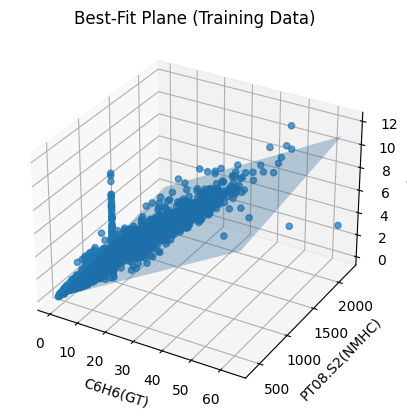

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[feature1], X_train[feature2], y_train, alpha=0.7)

# Create a mesh for plotting the plane
x_surf = np.linspace(X_train[feature1].min(), X_train[feature1].max(), 20)
y_surf = np.linspace(X_train[feature2].min(), X_train[feature2].max(), 20)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

z_surf = model.predict(pd.DataFrame(np.column_stack((x_surf.ravel(), y_surf.ravel())), columns = features))
z_surf = z_surf.reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(target_col)
ax.set_title("Best-Fit Plane (Training Data)")
plt.show()

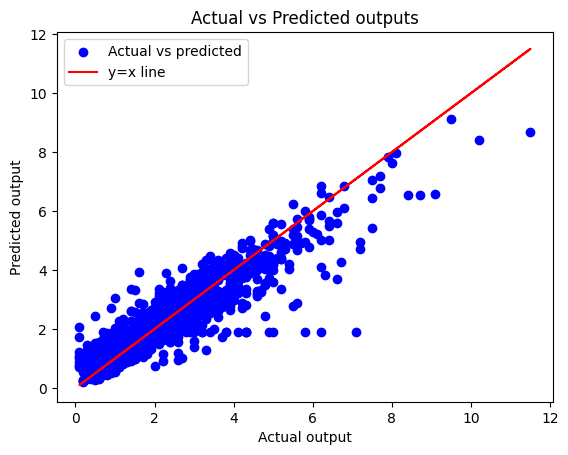

In [50]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, color="blue", label="Actual vs predicted")
plt.plot(y_test, y_test, color="red", label="y=x line")
plt.xlabel("Actual output")
plt.ylabel("Predicted output")
plt.title("Actual vs Predicted outputs")
plt.legend()
plt.show()

In [41]:
# from mpl_toolkits import mplot3d

In [40]:

# fig = plt.figure()
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# # creating a range of 12 elements in both
# # X and Y
# X = np.arange(12)
# Y = np.linspace(12, 1)

# X, Y = np.meshgrid(X, Y)
# Z = X*2+Y*3;

# # Creating a wireframe plot with the 3 sets of 
# # values X,Y and Z
# ax.plot_wireframe(X, Y, Z)

# # Creating my second subplot with 1x2 axis and defining 
# # it as the second plot with projection as 3D
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# # defining a set of points for X,Y and Z
# X1 = [1,2,1,4,3,2,7,5,9]
# Y1 = [8,2,7,4,3,6,1,8,9]
# Z1 = [1,2,4,7,9,6,7,6,9]

# # Plotting 3 points X1,Y1,Z1 with 
# # color as green
# ax.plot(X1, Y1, Z1,color='green')

# # Showing the above plot
# plt.show()


In [39]:
# fig = plt.figure()
# # ax = plt.axes(projection='3d')
# ax = fig.add_subplot(1, 2, 1, projection='3d')
# plt.scatter(X_train[feature1], X_train[feature2], y_train, aplha=0.7)
# plt.show()


# x_surf = np.linspace(X_train[feature1].min(), X_train[feature1].max(), 20)
# y_surf = np.linspace(X_train[feature2].min(), X_train[feature2].max(), 20)

# x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# z_surf_temp = pd.DataFrame(np.column_stack((x_surf.ravel(), y_surf.ravel())))
# z_surf = model.predict(z_surf_temp)
# z_surf = z_surf.reshape(x_surf.shape)

# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.plot_wireframe(x_surf, y_surf, z_surf, color="red", alpha =0.5)

# plt.legend()
# plt.show()
# # X, Y = np.meshgrid(X, Y)
# # ax.plot_wireframe(X, Y, Z)
# # ax.plot_wireframe(X, Y, Z)
 